
#### `Hetal Khanapure`
 - M.No : +91-9948251997
 - Email ID : hetu.parmar@gmail.com

# Lead Scoring Case Study

### Problem Statement:

 - X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 - The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 - Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

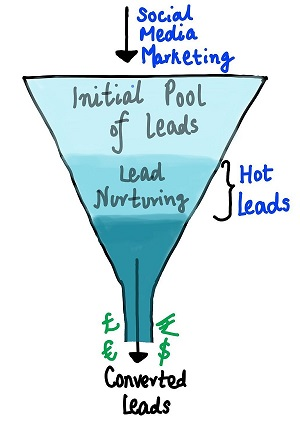

Lead Conversion Process - Demonstrated as a funnel


- The company requires to build a model wherein  need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Problem

X Education gets a lot of leads but its lead conversion rate is very poor. so the company wishes to identify the most potential leads.i.e. the leads that are most likely to convert into paying customers

- Data Given :provided with a leads dataset from the past with around 9000 data points and a Data Dictionary.
- `Converted` is the Target Variable.whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.


## 1) Data Understanding

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [2]:
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading data
df_lead=pd.read_csv("Leads.csv")
# checking first few data 
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check the shape of dataframe
df_lead.shape

(9240, 37)

In [5]:
# check the basic infor of dataframe
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are 9240 rows and 37 colums.
- Dataset contains float,int,and string data
- we can see null values in dataset in few columns.


## 2) Data Cleaning

### Handling missing values

In [6]:
# fuction to find missing value percetnage
def findmissingval():
    df_missing=pd.DataFrame((df_lead.isnull().sum()  / df_lead.shape[0] *100).round(3),columns=['Percentage'])
    return df_missing    

In [7]:
# replace Select values with NaN
df_lead = df_lead.replace('Select', np.nan)

In [8]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
How did you hear about X Education,78.463
Lead Profile,74.188
Lead Quality,51.591
Asymmetrique Profile Score,45.649
Asymmetrique Activity Score,45.649
Asymmetrique Activity Index,45.649
Asymmetrique Profile Index,45.649
City,39.708
Specialization,36.580
Tags,36.288


In [9]:
# select columns having more than 40% missing values.
columnstodrop=df_missing[df_missing['Percentage'] > 40]
columnstodrop.index


Index(['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [10]:
# drop the columns which having more than 40% missing values
df_lead=df_lead.drop(columnstodrop.index,axis=1)

In [11]:
# check the missing value percentage 
df_missing=pd.DataFrame((df_lead.isnull().sum()  / df_lead.shape[0] *100).round(3),columns=['Percentage'])
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
City,39.708
Specialization,36.580
Tags,36.288
What matters most to you in choosing a course,29.318
What is your current occupation,29.113
Country,26.634
Page Views Per Visit,1.483
TotalVisits,1.483
Last Activity,1.115
Lead Source,0.390


### NOTE:
 - Need to identify hot leads from the data generated directly from source.
 - Sales people added some sales related columns but we want to help them to decide wt are hot leads before they approach them.
 - Therefore, sales column therefore needs to be dropped as it will affect the analysis at later stage

In [12]:
df_lead["Last Notable Activity"].value_counts(normalize=True)

Modified                        0.368723
Email Opened                    0.305952
SMS Sent                        0.235065
Page Visited on Website         0.034416
Olark Chat Conversation         0.019805
Email Link Clicked              0.018723
Email Bounced                   0.006494
Unsubscribed                    0.005087
Unreachable                     0.003463
Had a Phone Conversation        0.001515
Email Marked Spam               0.000216
Approached upfront              0.000108
Resubscribed to emails          0.000108
Form Submitted on Website       0.000108
Email Received                  0.000108
View in browser link Clicked    0.000108
Name: Last Notable Activity, dtype: float64

In [13]:
df_lead["Tags"].value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

In [14]:
df_lead["Last Activity"].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Received                  0.000219
Email Marked Spam               0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

 - Hence the above feature mentioned that are:
    - `Last Activity`
    - `Tags`
    - `Last Notable Activity`

 - Are Sales Team Related Column
 - Needs to be droped before starting analysis to identify Hot Leads from the data generated

In [15]:
# dropping the columns related to sales team
df_lead=df_lead.drop(['Last Activity','Tags','Last Notable Activity'],axis=1)
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
City,39.708
Specialization,36.580
What matters most to you in choosing a course,29.318
What is your current occupation,29.113
Country,26.634
TotalVisits,1.483
Page Views Per Visit,1.483
Lead Source,0.390
X Education Forums,0.000
I agree to pay the amount through cheque,0.000


In [17]:
df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [18]:
# drop 'What matters most to you in choosing a course' column
df_lead.drop('What matters most to you in choosing a course',1,inplace=True)

`What matters most to you in choosing a course` maximum rows have same value . so we can not get any important insight from this column so we will drop this.

In [19]:
# check the unique value in each column
df_lead.nunique()

Prospect ID                                 9240
Lead Number                                 9240
Lead Origin                                    5
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1731
Page Views Per Visit                         114
Country                                       38
Specialization                                18
What is your current occupation                6
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates

`Magazine`,`Receive More Updates About Our Courses`,`Update me on Supply Chain Content`,`Get updates on DM Content`,
`I agree to pay the amount through cheque` this variables have only one value so we will drop these columns.
                                           

In [20]:
# dropping the columns having only one value
df_lead=df_lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)

In [21]:
df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# Replace null values in 'What is your current occupation' with most common value

df_lead['What is your current occupation']=df_lead['What is your current occupation'].fillna(value='Unemployed')

In [23]:
df_lead['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
df_lead['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [25]:
# replace null values in 'Specialization' with 'Not specified'
df_lead['Specialization']= df_lead['Specialization'].fillna(value='Not Specified')

In [26]:
df_lead['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [27]:
#replace null value in city with Not specified
df_lead['City']= df_lead['City'].fillna(value='Not Specified')

In [28]:
df_lead['City'].value_counts()

Not Specified                  3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

as counts of other cities are less we can combine them and give as 'Other Cities'

In [29]:

df_lead.loc[((df_lead['City'] != 'Mumbai') & ( df_lead['City'] != 'Not Specified')),'City']='Other cities'


In [30]:
df_lead['City'].value_counts()

Not Specified    3669
Mumbai           3222
Other cities     2349
Name: City, dtype: int64

In [31]:
df_lead['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
Germany                    4
South Africa               4
Kuwait                     4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Netherlands                2
China                      2
Italy                      2
Uganda                     2
Ghana                      2
Bangladesh                 2
Belgium                    2
Tanzania                   1
Vietnam                    1
Denmark                    1
Indonesia                  1
Sri Lanka                  1
Kenya                      1
Malaysia      

In [32]:

df_lead.loc[((df_lead['Country'] != 'India') ),'Country']='Other'

`country` column have most value as India and other value are very less so we will combine other country and name it them as Other

In [33]:
df_lead['Country'].value_counts()

India    6492
Other    2748
Name: Country, dtype: int64

In [34]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
TotalVisits,1.483
Page Views Per Visit,1.483
Lead Source,0.390
Prospect ID,0.000
What is your current occupation,0.000
City,0.000
Through Recommendations,0.000
Digital Advertisement,0.000
Newspaper,0.000
X Education Forums,0.000


In [35]:
# checking values for TotalVisits
df_lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [36]:
# checking values for TotalVisits
df_lead['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
2.20        9
14.00       9
4.33        9
2.80        9
3.25        8
1.60        8
2.17        8
2.40        6
13.00       6
1.20        5
12.00       5
2.60        4
15.00       4
1.83        4
1.71        4
1.43        4
3.40        4
5.67        3
1.38        3
1.78        3
1.57        3
16.00       3
4.25        3
4.75        3
2.09        2
3.75        2
2.22        2
1.22        2
2.83        2
5.33        2
1.56        2
1.14        2
2.71        2
5.40        2
7.50        2
5.25        2
3.20        2
3.60        2
1.23        2
3.57        1
4.17        1
1.63  

In [37]:
# Replace TotalVisits,Page Views Per Visit,Lead Source,Last Activity with most occurent value 
df_lead['TotalVisits']= df_lead['TotalVisits'].fillna(value=0.0)
df_lead['Page Views Per Visit']= df_lead['Page Views Per Visit'].fillna(value=0.0)
df_lead['Lead Source']=df_lead['Lead Source'].fillna(value='Google')


In [38]:
# checking values for Lead Source
df_lead['Lead Source'].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
testone                 1
youtubechannel          1
blog                    1
Name: Lead Source, dtype: int64

we will combine lead source which are less in count as other

In [39]:
df_lead.loc[((df_lead['Lead Source'] != 'Google') & (df_lead['Lead Source'] != 'Direct Traffic') & (df_lead['Lead Source'] != 'Olark Chat') 
             & (df_lead['Lead Source'] != 'Organic Search') & (df_lead['Lead Source'] != 'Reference') & (df_lead['Lead Source'] != 'Welingak Website')
             & (df_lead['Lead Source'] != 'Referral Sites')
            ),'Lead Source']='Other'


In [40]:
df_lead['Lead Source'].value_counts()

Google              2904
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other                 83
Name: Lead Source, dtype: int64

In [41]:
# checking values for Lead Source
df_lead['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [42]:
# checking values for Newspaper Article
df_lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [43]:
# checking values for 'X Education Forums'
df_lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [44]:
# checking values for 'Search'
df_lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [45]:
# checking values for 'Newspaper'
df_lead['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [46]:
# checking values for 'Digital Advertisement'
df_lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [47]:
# checking values for 'Through Recommendations'
df_lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

`Newspaper Article` 
`X Education Fourms` 
`Search`
`Newspaper`
`Digital Advertisement`
`Through Recommendations`
have single value mostly so we can drop this columns.

In [48]:
df_lead=df_lead.drop(['Newspaper Article','X Education Forums','Search','Newspaper','Digital Advertisement','Through Recommendations'],axis=1)

In [49]:
# find out the percentage of missing value in each column
df_missing=findmissingval()
df_missing.sort_values(by='Percentage',ascending=False)

,Percentage
Prospect ID,0.0
Lead Number,0.0
Lead Origin,0.0
Lead Source,0.0
Do Not Email,0.0
Do Not Call,0.0
Converted,0.0
TotalVisits,0.0
Total Time Spent on Website,0.0
Page Views Per Visit,0.0


`Prospect ID` and `Lead Number` are unique for every lead its ID so we will drop this columns

In [50]:
# dropping ID related columns
df_lead= df_lead.drop(['Prospect ID','Lead Number'],axis=1)

In [51]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Other,Not Specified,Unemployed,Not Specified,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Not Specified,Unemployed,Not Specified,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Not Specified,Unemployed,Mumbai,No


### Checking Outliers

In [52]:
# check the basic statastics of dataframe
df_lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


From above statastics we can see outliers in `TotalVisits` , `Total Time Spent on Website` and `Page Views Per Visit`


<AxesSubplot:ylabel='Page Views Per Visit'>

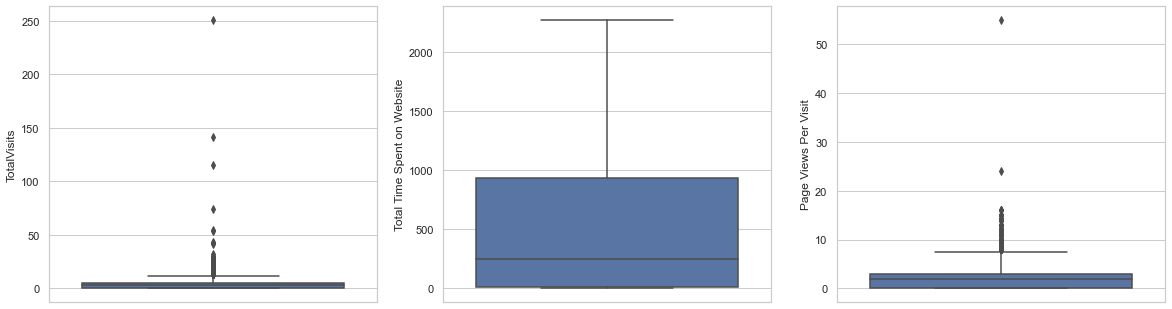

In [53]:
# box plot for above three columns
plt.figure(figsize=(20,25))
plt.subplot(4,3,1)
sns.boxplot(y='TotalVisits',data=df_lead)
plt.subplot(4,3,2)
sns.boxplot(y='Total Time Spent on Website',data=df_lead)
plt.subplot(4,3,3)
sns.boxplot(y='Page Views Per Visit',data=df_lead)

In [54]:
# lets see how s the box plot after removing beyond 99% data
df_totalvisits=df_lead[df_lead['TotalVisits'] < df_lead['TotalVisits'].quantile(0.99)]
df_pageviews=df_lead[df_lead['Page Views Per Visit'] < df_lead['Page Views Per Visit'].quantile(0.99)]

<AxesSubplot:ylabel='Page Views Per Visit'>

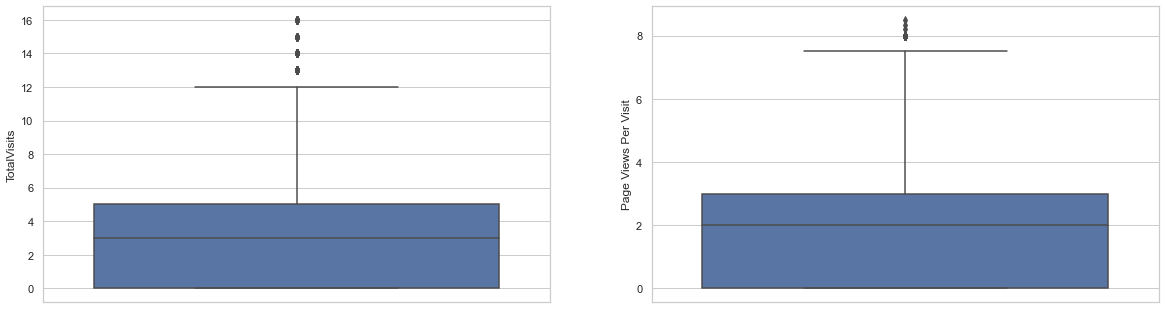

In [55]:
# box plot for above three columnsPage Views Per Visit
plt.figure(figsize=(20,25))
plt.subplot(4,2,1)
sns.boxplot(y='TotalVisits',data=df_totalvisits)
plt.subplot(4,2,2)
sns.boxplot(y='Page Views Per Visit',data=df_pageviews)


In [56]:
# update the originoal dataframe to exclude data abouve 0.99 quantile in TotalVisits and Page views pervisit
df_lead=df_lead[df_lead['TotalVisits'] < df_lead['TotalVisits'].quantile(0.99)]
df_lead=df_lead[df_lead['Page Views Per Visit'] < df_lead['Page Views Per Visit'].quantile(0.99)]

 - Converstion rate is high when people spend more time on `website`.

In [57]:
df_lead.nunique()

Lead Origin                                  5
Lead Source                                  8
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 17
Total Time Spent on Website               1717
Page Views Per Visit                        57
Country                                      2
Specialization                              19
What is your current occupation              6
City                                         3
A free copy of Mastering The Interview       2
dtype: int64

## 3) Exploratory Data Analysis

### Analysis of categorical variable with target variable

In [58]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Other,Not Specified,Unemployed,Not Specified,No
1,API,Organic Search,No,No,0,5.0,674,2.5,India,Not Specified,Unemployed,Not Specified,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Not Specified,Unemployed,Mumbai,No


In [59]:
# print percentage on top of each bar
def displaypercentage(ax,feature):
    
    total = len(df_lead[feature])
    for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center',va='bottom',fontsize=12,color='blue')


In [60]:
# catplot for categorical variable vs target column
def plot_uni_Cat(feature,size,x_tick_rot,displayperc):
    
    plt.figure(figsize=size)
    cat1=sns.countplot(data=df_lead,x=str(feature),hue='Converted')
    
    plt.title(f"{feature} vs Converted",fontsize=14)
    
    plt.xticks(rotation=x_tick_rot)
    if (displayperc):
        displaypercentage(cat1,feature)
    plt.show()

#### Checking lead conversion

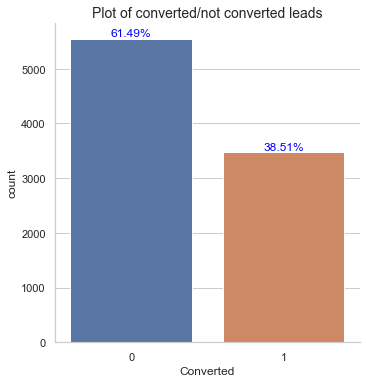

In [61]:
# check the 'Converted' column
pl=sns.catplot(data=df_lead,x='Converted',kind="count")
plt.title('Plot of converted/not converted leads', fontsize = 14)
ax = pl.facet_axis(0,0)
displaypercentage(ax,'Converted')
plt.show()


38.5% leads converted and 61.5% leads are not converted

In [62]:
# To find Data Imbalance Ratio

not_converted  = df_lead[df_lead["Converted"] == 0]
converted  = df_lead[df_lead["Converted"] == 1]

print("No. of converted leads: ", converted.shape[0])
print("\nNo. of not-converted leads: ", not_converted.shape[0])
print("\nPercentage of converted leads: ", converted.shape[0]*100/(converted.shape[0]+not_converted.shape[0]))

No. of converted leads:  3477

No. of not-converted leads:  5552

Percentage of converted leads:  38.50924797873519


#### Lead origin and lead source with target variable

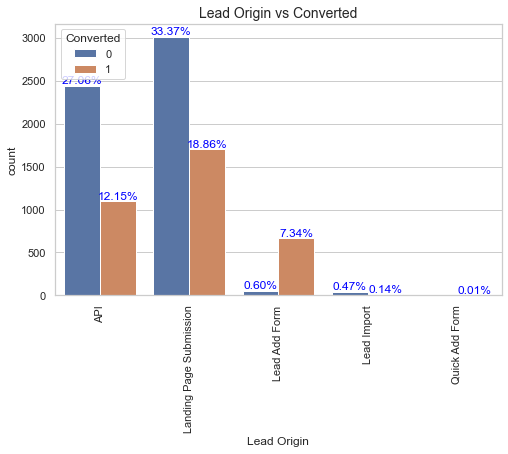

In [63]:
# plot for Lead Orgin vs converted
plot_uni_Cat('Lead Origin',(8,5),90,True)


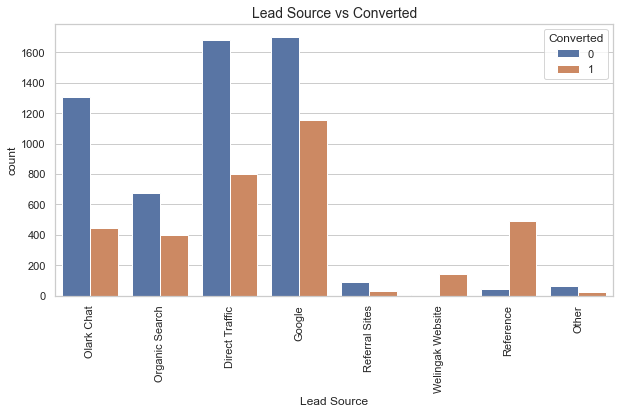

In [64]:
plot_uni_Cat('Lead Source',(10,5),90,False)

- Lead conversion rate is high when lead origin is Landing Page Submission.
- Lead conversion rate is high when lead source is Google.
- Lead conversion rate is high when lead source is welingak website

#### Do not Email / call vs converted

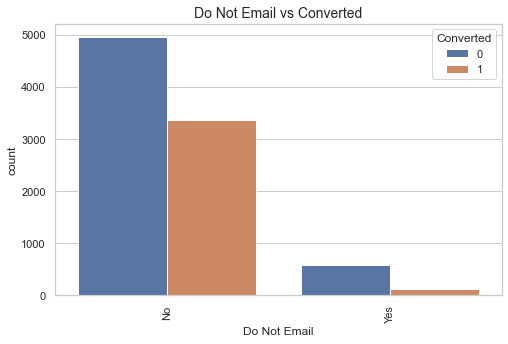

In [65]:
# plot for Do Not Email vs converted
plot_uni_Cat('Do Not Email',(8,5),90,False)

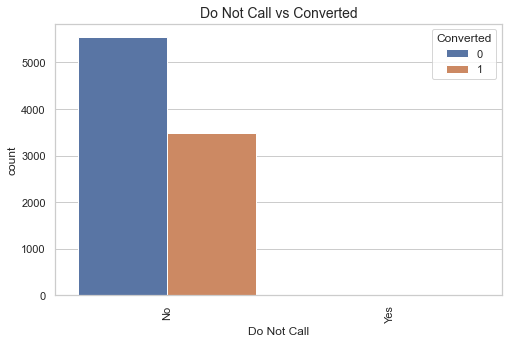

In [66]:
# plot for Do Not Call vs converted
plot_uni_Cat('Do Not Call',(8,5),90,False)

- Lead converstion rate is high when People want to get mail
- Lead conversion rate is high when people want to get call

#### City ,country vs Converted

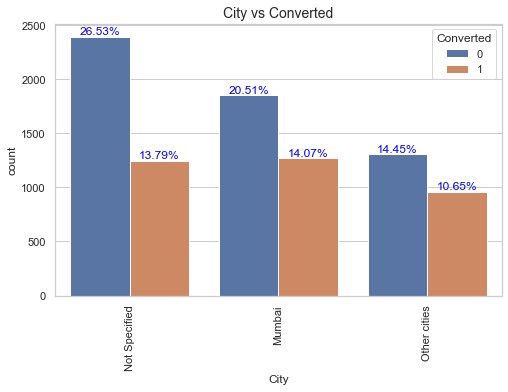

In [67]:
# plot for City vs converted
plot_uni_Cat('City',(8,5),90,True)

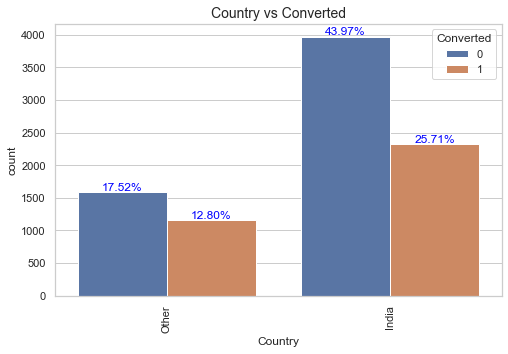

In [68]:
# plot for City vs converted
plot_uni_Cat('Country',(8,5),90,True)

- Lead conversion rate is high in Mumbai and when city is not specified , Lead conversion rate is very low in Tier II Cities.

#### Specialization,What is your current occupation vs Converted

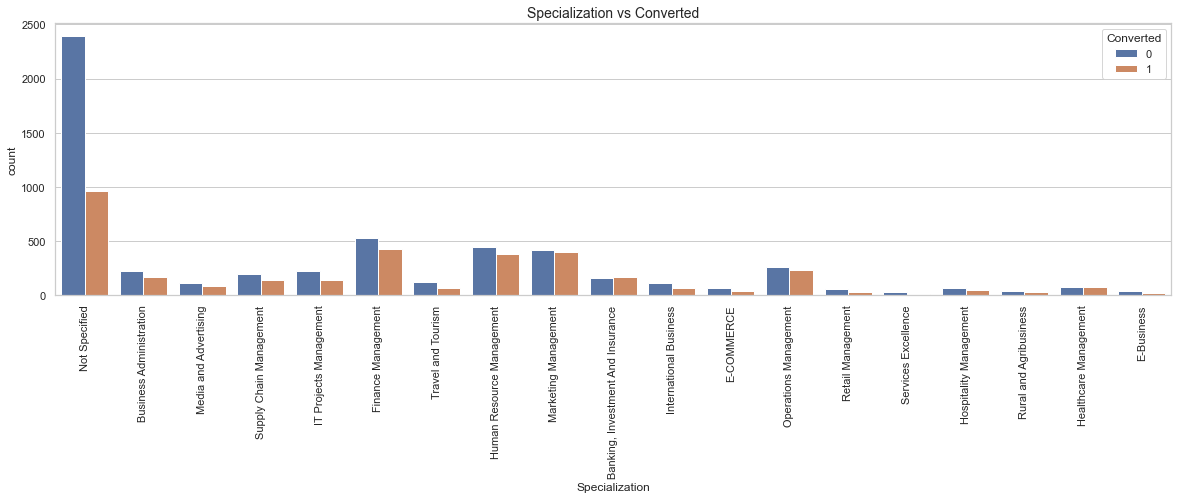

In [69]:
# plot for Specialization vs converted
plot_uni_Cat('Specialization',(20,5),90,False)

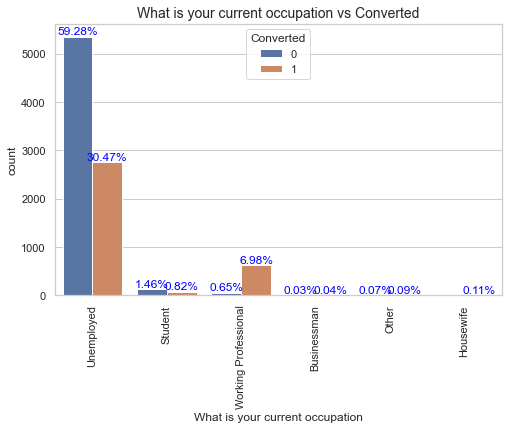

In [70]:
# plot for What is your current occupation vs converted
plot_uni_Cat('What is your current occupation',(8,5),90,True)

- Maximum customer had not selected this option while filling the form. and the conversion rate is high in them.
- Lead conversion rate is high in Unemployed customer and 100% conversion rate in Housewife.
- Working proffessional occupation leads are likely to be convert.

#### A free copy of Mastering The Interview vs converted

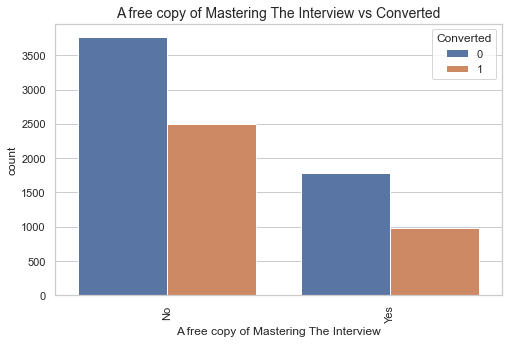

In [71]:
# A free copy of Mastering The Interview
plot_uni_Cat('A free copy of Mastering The Interview',(8,5),90,False)

- maximum customer doesnt want a free copy of mastering the interview
- lead conversion rate is high in customers who do not want a free copy of mastering in inerview

### Analysis of Numerical variable with target variable

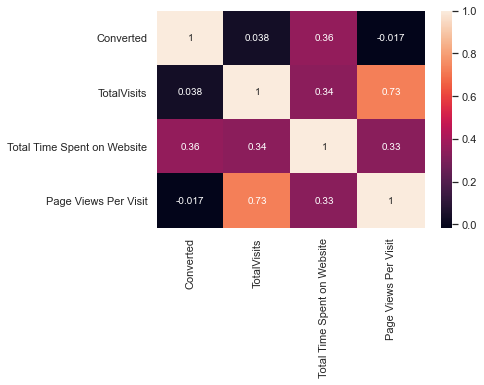

In [72]:
# ploting heat map to check correlation of numeric variables
corr_matric= df_lead.corr()
sns.heatmap(corr_matric,annot=True,fmt='.2g')
plt.show()

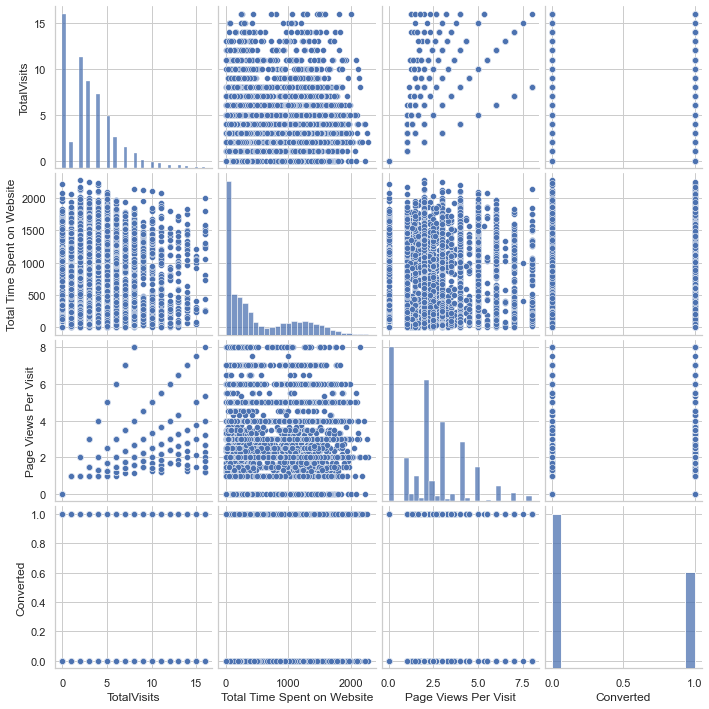

In [73]:
# scatter plot to check the relation between numerical variable
col_pairplot=['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']
sns.pairplot(df_lead[col_pairplot])
plt.show()

## 4) Data Preparation

### Converting binary variables(yes/no) to 0/1

In [74]:
# List of variables to map
binary_var=['Do Not Email','Do Not Call','A free copy of Mastering The Interview']

# function to map variable
def binary_map(var):
    return var.map({'No':0,'Yes':1})

# apply the function to the dataframe 
df_lead[binary_var] = df_lead[binary_var].apply(binary_map)


In [75]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Other,Not Specified,Unemployed,Not Specified,0
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Not Specified,Unemployed,Not Specified,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Not Specified,Unemployed,Mumbai,0


### Dummy Features For categorical variables with multiple levels(one-hot encoded)

In [76]:
# creating list of dummy variables
varlist_real=['Lead Origin','Lead Source','Specialization','What is your current occupation','City','Country']
varlist_dummies=['LeadOrigin','LeadSource','Specialization','Current_Occupation','City','Country']


In [77]:
# creating data frames for dummy variables
dfs= {}
for i,j in zip(varlist_real,varlist_dummies):
    dfs['dummies_'+j]  = pd.get_dummies(df_lead[i],prefix=j,drop_first=True)
    

In [78]:
# combine all the dummy variables into one dataframe
df_dummies=pd.concat([dfs['dummies_LeadOrigin'],dfs['dummies_LeadSource'],
                     dfs['dummies_Specialization'],dfs['dummies_Current_Occupation'],dfs['dummies_City'],dfs['dummies_Country']],axis=1)

In [79]:
df_dummies.head()

,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Not Specified,City_Other cities,Country_Other
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [80]:
#combine dummy variable with main dataframe
df_lead=pd.concat([df_lead,df_dummies],axis=1)

In [81]:
df_lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Not Specified,City_Other cities,Country_Other
0,API,Olark Chat,0,0,0,0.0,0,0.0,Other,Not Specified,Unemployed,Not Specified,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,API,Organic Search,0,0,0,5.0,674,2.5,India,Not Specified,Unemployed,Not Specified,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Mumbai,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Mumbai,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Not Specified,Unemployed,Mumbai,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### Dropping the repeated variables

In [82]:
df_lead=df_lead.drop(varlist_real,axis=1)

In [83]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 44 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9029 non-null   int64  
 1   Do Not Call                               9029 non-null   int64  
 2   Converted                                 9029 non-null   int64  
 3   TotalVisits                               9029 non-null   float64
 4   Total Time Spent on Website               9029 non-null   int64  
 5   Page Views Per Visit                      9029 non-null   float64
 6   A free copy of Mastering The Interview    9029 non-null   int64  
 7   LeadOrigin_Landing Page Submission        9029 non-null   uint8  
 8   LeadOrigin_Lead Add Form                  9029 non-null   uint8  
 9   LeadOrigin_Lead Import                    9029 non-null   uint8  
 10  LeadOrigin_Quick Add Form           

## 5) Test-Train Split

  We will split data in to two parts :
   - Training Dataset : 70% of data
   - Test Dataset: 30% of data

In [84]:
# Putting feature variable to X
X = df_lead.loc[ : , df_lead.columns != 'Converted']

X.head()


,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Not Specified,City_Other cities,Country_Other
0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [85]:
# Putting response variable to y
y = df_lead['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [86]:

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 6) Rescaling the features

We will Rescale following variables for better model evaluation:
 - `TotalVisits` : The total number of visits made by the customer on the website.
 - `Total Time Spent on Website`   : The total time spent by the customer on the website.
 - `Page Views Per Visit`: Average number of pages on the website viewed during the visits.
 

In [87]:
# Rescaling the above features
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadOrigin_Quick Add Form,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional,City_Not Specified,City_Other cities,Country_Other
5493,0,0,-0.374937,-0.708153,-0.117539,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8064,0,0,-0.023520,-0.711823,0.422224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4716,1,0,-0.023520,-0.471434,0.422224,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9117,0,0,-1.077771,-0.884316,-1.197064,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2402,0,0,1.030730,0.704822,-0.117539,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [88]:
### Checking the lead Converted Rate
converted = (sum(df_lead['Converted'])/len(df_lead['Converted'].index))*100
converted

38.50924797873519

we have almost 39% lead convertsion rate

## 7) Checking Correlations

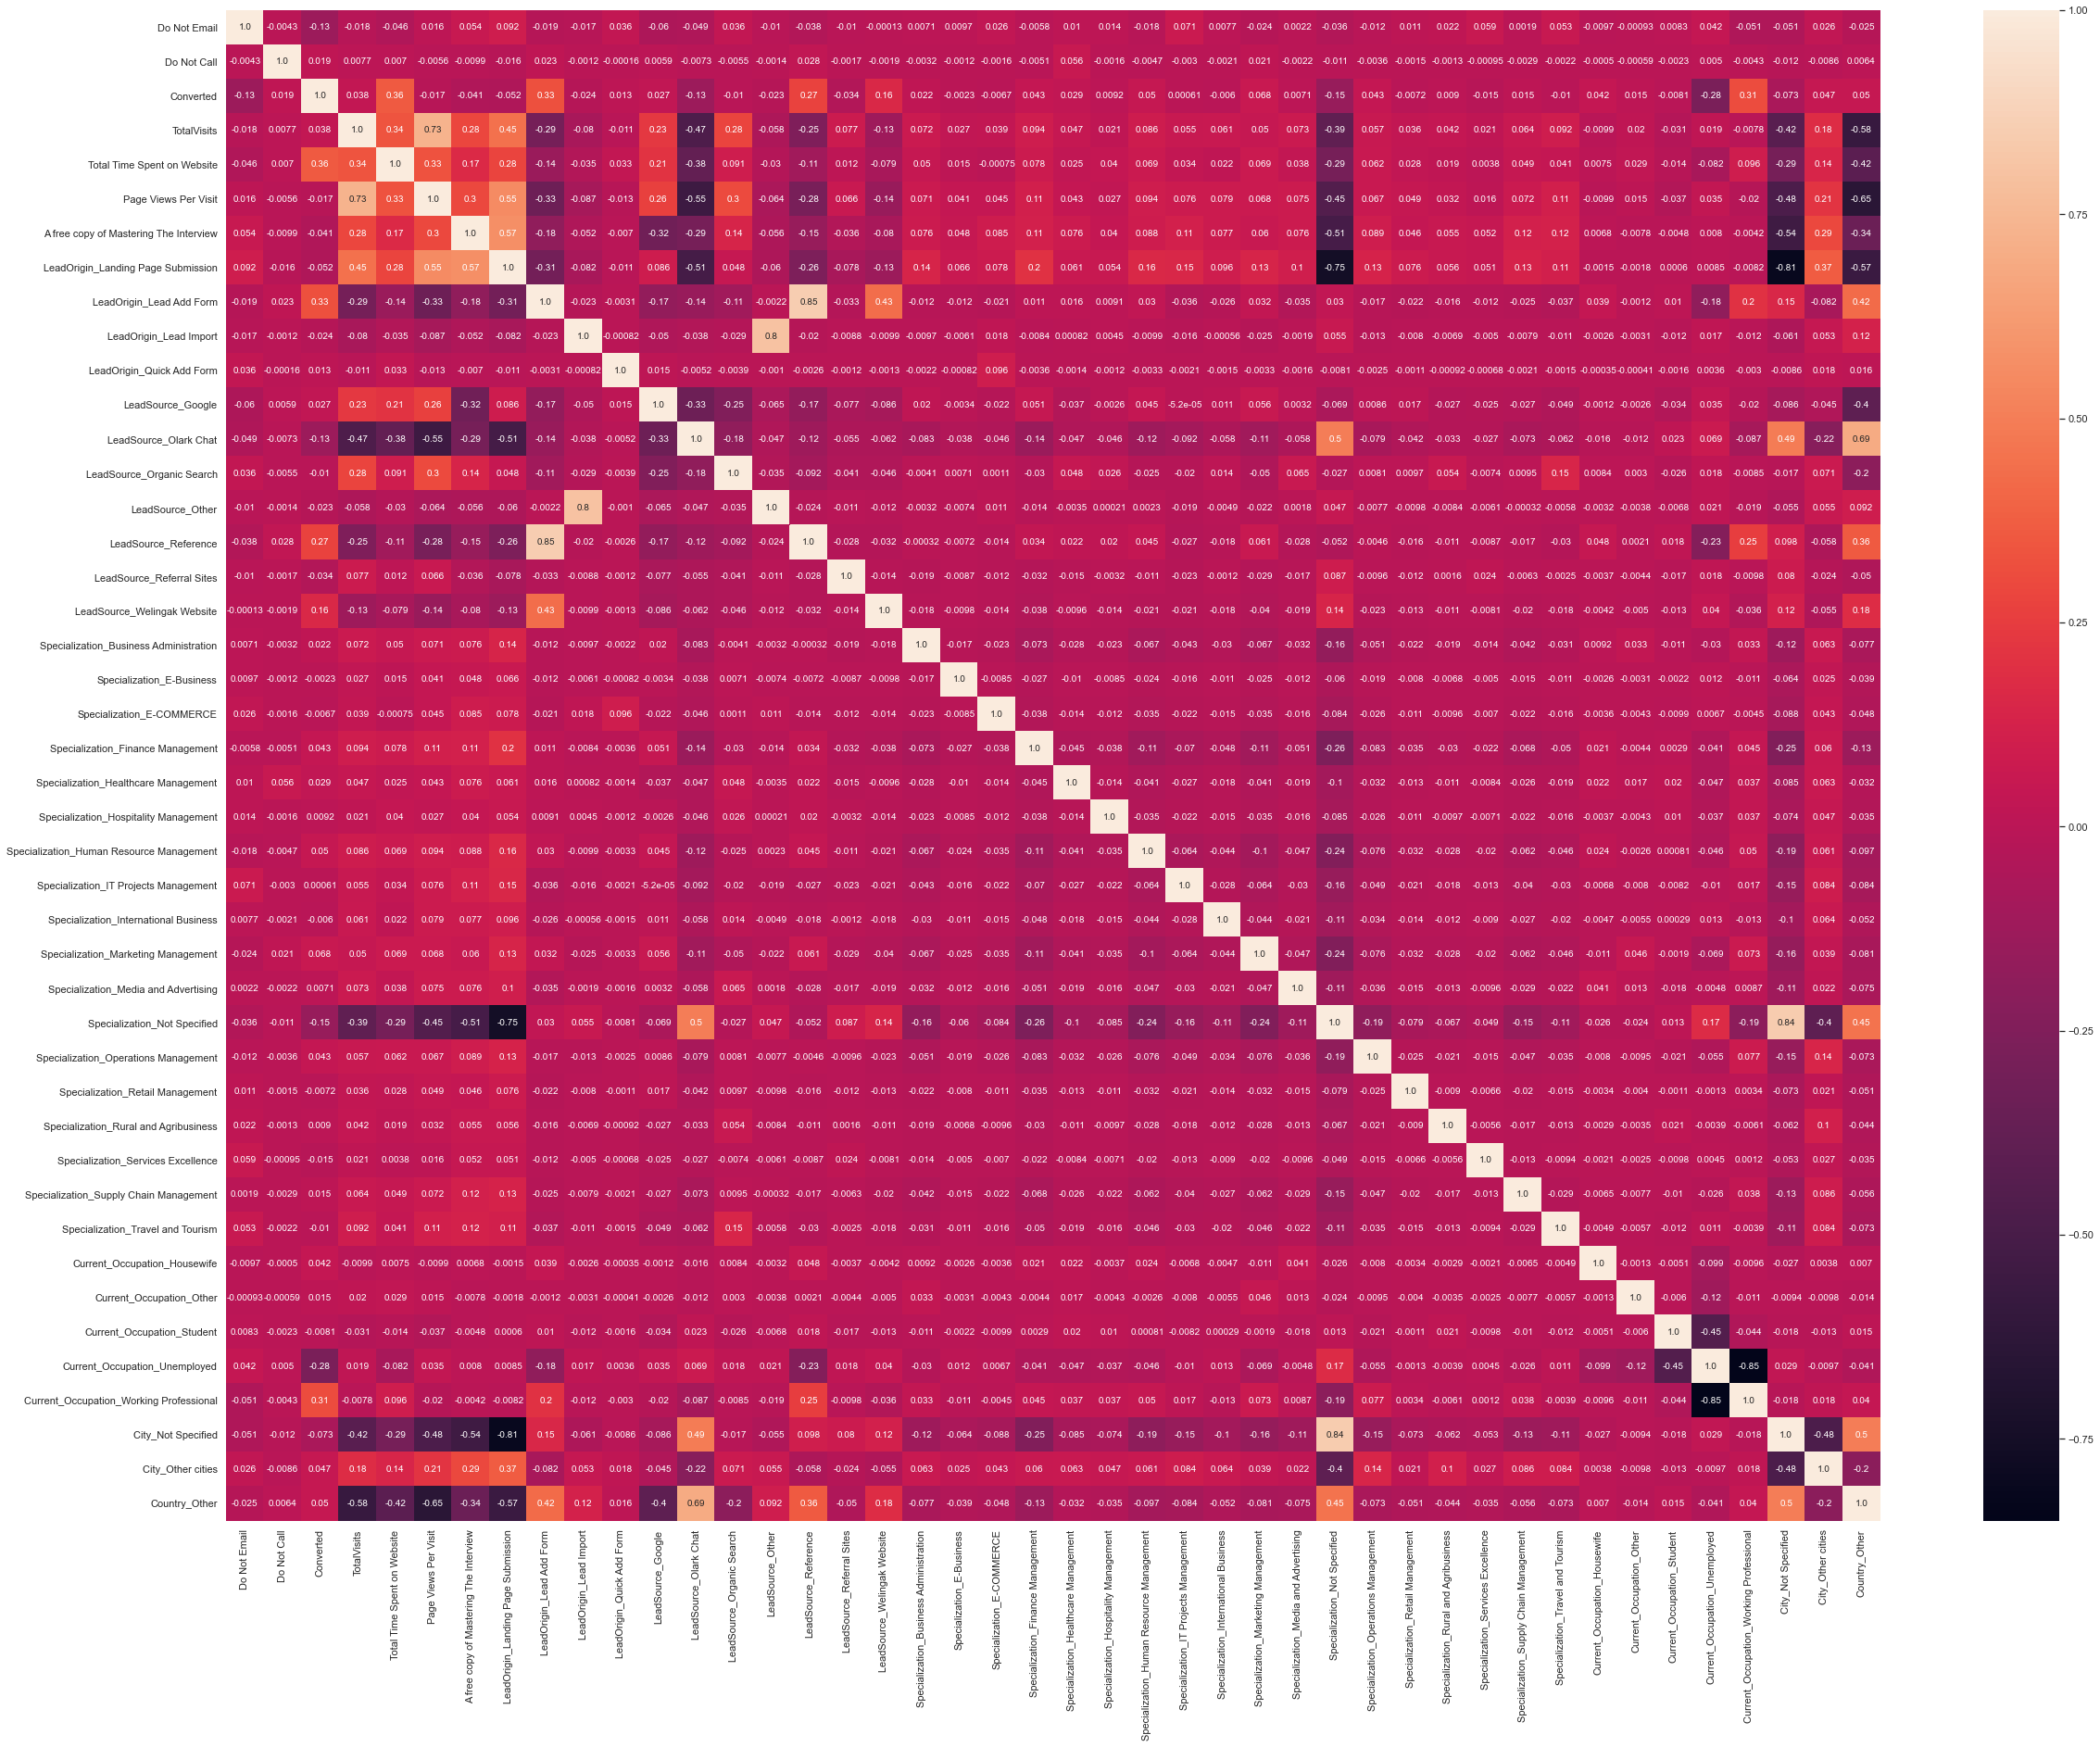

In [89]:
#checking correlation with heat map
plt.figure(figsize = (40,30))   
sns.heatmap(df_lead.corr(),annot=True, fmt='.2')
plt.show()

## 8) Model Building

building logistic regression model with all the features

In [90]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           41
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 May 2021   Deviance:                          nan
Time:                        16:23:23   Pearson chi2:                 9.54e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                     9.164e+14   3.08e+07   2.98e+07      0.000    9.16e+14    9.16e+14
Do Not Email                             -8.677e+14   3.23e+06  -2.69e+08      0.000   -8.68e+14   -8.68e+14
Do Not Call                                  1.2373   3.27e-08   3.79e+07      0.000       1.237       1.237
TotalVisits                              -1.892e+13   1.29e+06  -1.47e+07      0.000   -1.89e+13   -1.89e+13
Total Time Spent on Website               4.224e+14    9.6e+05    4.4e+08      0.000    4.22e+14    4.22e+14
Page Views Per Visit                     -6.265e+12   1.45e+06  -4.33e+06      0.000   -6.26e+12   -6.26e+12
A free copy of Mastering The Interview    3.897e+13   2.75e+06   1.42e+07      0.000     3.9e+13     3.9e+13
LeadOrigin_Landing Page Submission       -3.019e+14   3.75e+06  -8.06e+07      0.000   -3.02e+14   -3.02e+14
LeadOrigin_Lead Add Form                  8.361e+14   1.29e+07    6.5e+07      0.000    8.36e+14    8.36e+14
LeadOrigin_Lead Import                   -3.472e+14   1.86e+07  -1.87e+07      0.000   -3.47e+14   -3.47e+14
LeadOrigin_Quick Add Form                   -1.0245   6.19e-08  -1.66e+07      0.000      -1.024      -1.024
LeadSource_Google                        -4.689e+13   2.87e+06  -1.63e+07      0.000   -4.69e+13   -4.69e+13
LeadSource_Olark Chat                    -8.204e+14   5.03e+06  -1.63e+08      0.000    -8.2e+14    -8.2e+14
LeadSource_Organic Search                 1.974e+13   3.29e+06   6.01e+06      0.000    1.97e+13    1.97e+13
LeadSource_Other                          -5.41e+14   1.48e+07  -3.66e+07      0.000   -5.41e+14   -5.41e+14
LeadSource_Reference                      6.731e+14    1.3e+07   5.16e+07      0.000    6.73e+14    6.73e+14
LeadSource_Referral Sites                -4.647e+14    8.3e+06   -5.6e+07      0.000   -4.65e+14   -4.65e+14
LeadSource_Welingak Website               2.508e+15   1.41e+07   1.78e+08      0.000    2.51e+15    2.51e+15
Specialization_Business Administration    9.709e+13   6.28e+06   1.55e+07      0.000    9.71e+13    9.71e+13
Specialization_E-Business                 2.993e+14   1.28e+07   2.34e+07      0.000    2.99e+14    2.99e+14
Specialization_E-COMMERCE                 1.116e+14   9.21e+06   1.21e+07      0.000    1.12e+14    1.12e+14
Specialization_Finance Management         7.012e+13    5.4e+06    1.3e+07      0.000    7.01e+13    7.01e+13
Specialization_Healthcare Management      1.946e+14   7.83e+06   2.48e+07      0.000    1.95e+14    1.95e+14
Specialization_Hospitality Management    -5.225e+13   8.97e+06  -5.82e+06      0.000   -5.22e+13   -5.22e+13
Specialization_Human Resource Management  2.174e+14   5.53e+06   3.93e+07      0.000    2.17e+14    2.17e+14
Specialization_IT Projects Mana

we have many features so we will use RFE to select features.

## 9) Feature selection using RFE

In [91]:
logreg = LogisticRegression()

The predictor variables are more so we will use RFE(Recursive Feature Elimination)
We will pass arbitory number of variable to select, in this case lets take 15.

In [92]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [93]:
# create datafrme of the variable with rfe rank
rfe_df = pd.DataFrame({'variables': X_train.columns, 'Support': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,variables,Support,Ranking
0,Do Not Email,True,1
40,City_Not Specified,True,1
39,Current_Occupation_Working Professional,True,1
3,Total Time Spent on Website,True,1
38,Current_Occupation_Unemployed,True,1
37,Current_Occupation_Student,True,1
6,LeadOrigin_Landing Page Submission,True,1
7,LeadOrigin_Lead Add Form,True,1
8,LeadOrigin_Lead Import,True,1
36,Current_Occupation_Other,True,1


In [94]:
# Rfe supported variable
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form', 'LeadOrigin_Lead Import', 'LeadSource_Olark Chat', 'LeadSource_Welingak Website', 'Specialization_Hospitality Management', 'Specialization_Not Specified', 'Current_Occupation_Housewife', 'Current_Occupation_Other', 'Current_Occupation_Student', 'Current_Occupation_Unemployed', 'Current_Occupation_Working Professional', 'City_Not Specified'], dtype='object')

### Building model using statsmodel, for the detailed statistics

### model1

In [95]:
X_train_M1 = X_train[col]
X_train_sm = sm.add_constant(X_train_M1)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2933.4
Date:                Sun, 16 May 2021   Deviance:                       5866.7
Time:                        16:23:26   Pearson chi2:                 8.14e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.5229      1.113     -0.470      0.639      -2.705       1.659
Do Not Email                               -1.1596      0.154     -7.523      0.000      -1.462      -0.857
Total Time Spent on Website                 1.0746      0.038     28.274      0.000       1.000       1.149
LeadOrigin_Landing Page Submission         -1.2109      0.138     -8.787      0.000      -1.481      -0.941
LeadOrigin_Lead Add Form                    3.4429      0.212     16.269      0.000       3.028       3.858
LeadOrigin_Lead Import                     -0.4912      0.453     -1.085      0.278      -1.378       0.396
LeadSource_Olark Chat                       0.8118      0.113      7.196      0.000       0.591       1.033
LeadSource_Welingak Website                 2.6699      0.744      3.590      0.000       1.212       4.128
Specialization_Hospitality Management      -0.5827      0.303     -1.922      0.055      -1.177       0.012
Specialization_Not Specified               -0.9201      0.150     -6.121      0.000      -1.215      -0.625
Current_Occupation_Housewife               23.4589   1.64e+04      0.001      0.999    -3.2e+04    3.21e+04
Current_Occupation_Other                    0.0413      1.313      0.031      0.975      -2.532       2.614
Current_Occupation_Student                  0.8640      1.129      0.765      0.444      -1.349       3.077
Current_Occupation_Unemployed               0.7108      1.109      0.641      0.522      -1.463       2.885
Current_Occupation_Working Professional     3.2887      1.122      2.931      0.003       1.089       5.488
City_Not Specified                         -0.5960      0.163     -3.649      0.000      -0.916      -0.276
===========================================================================================================
"""

`Current_Occupation_Housewife` having high p-value so we will drop this feature.

In [96]:
X_train_M2 = X_train_M1.drop(["Current_Occupation_Housewife"], axis = 1)

Rebuilding the model without `Current_Occupation_Housewife` 

### Model2

In [97]:
X_train_sm2 = sm.add_constant(X_train_M2)
logm3 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2936.9
Date:                Sun, 16 May 2021   Deviance:                       5873.8
Time:                        16:23:26   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.2898      0.802      1.608      0.108      -0.282       2.862
Do Not Email                               -1.1598      0.154     -7.527      0.000      -1.462      -0.858
Total Time Spent on Website                 1.0738      0.038     28.272      0.000       0.999       1.148
LeadOrigin_Landing Page Submission         -1.2039      0.138     -8.749      0.000      -1.474      -0.934
LeadOrigin_Lead Add Form                    3.4389      0.212     16.258      0.000       3.024       3.853
LeadOrigin_Lead Import                     -0.4896      0.453     -1.082      0.279      -1.376       0.397
LeadSource_Olark Chat                       0.8098      0.113      7.181      0.000       0.589       1.031
LeadSource_Welingak Website                 2.6735      0.744      3.595      0.000       1.216       4.131
Specialization_Hospitality Management      -0.5823      0.303     -1.921      0.055      -1.176       0.012
Specialization_Not Specified               -0.9152      0.150     -6.106      0.000      -1.209      -0.621
Current_Occupation_Other                   -1.7739      1.062     -1.671      0.095      -3.855       0.307
Current_Occupation_Student                 -0.9539      0.822     -1.160      0.246      -2.565       0.657
Current_Occupation_Unemployed              -1.1071      0.795     -1.393      0.164      -2.664       0.450
Current_Occupation_Working Professional     1.4704      0.813      1.810      0.070      -0.122       3.063
City_Not Specified                         -0.5960      0.163     -3.654      0.000      -0.916      -0.276
===========================================================================================================
"""

`LeadOrigin_Lead Import` having high p-value so we will drop this feature

In [98]:
X_train_M3 = X_train_M2.drop(["LeadOrigin_Lead Import"], axis = 1)

### Model 3

In [99]:
X_train_sm3 = sm.add_constant(X_train_M3)
logm4 = sm.GLM(y_train,X_train_sm3, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6306
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2937.5
Date:                Sun, 16 May 2021   Deviance:                       5875.0
Time:                        16:23:26   Pearson chi2:                 8.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       1.2573      0.802      1.568      0.117      -0.314       2.829
Do Not Email                               -1.1598      0.154     -7.526      0.000      -1.462      -0.858
Total Time Spent on Website                 1.0767      0.038     28.398      0.000       1.002       1.151
LeadOrigin_Landing Page Submission         -1.1675      0.133     -8.766      0.000      -1.429      -0.906
LeadOrigin_Lead Add Form                    3.4564      0.211     16.390      0.000       3.043       3.870
LeadSource_Olark Chat                       0.8262      0.112      7.386      0.000       0.607       1.045
LeadSource_Welingak Website                 2.6728      0.744      3.594      0.000       1.215       4.130
Specialization_Hospitality Management      -0.5861      0.302     -1.938      0.053      -1.179       0.007
Specialization_Not Specified               -0.9403      0.148     -6.362      0.000      -1.230      -0.651
Current_Occupation_Other                   -1.7780      1.062     -1.675      0.094      -3.859       0.303
Current_Occupation_Student                 -0.9560      0.822     -1.163      0.245      -2.567       0.655
Current_Occupation_Unemployed              -1.1125      0.795     -1.400      0.162      -2.670       0.445
Current_Occupation_Working Professional     1.4636      0.813      1.801      0.072      -0.129       3.056
City_Not Specified                         -0.5443      0.156     -3.495      0.000      -0.850      -0.239
===========================================================================================================
"""

`Current_Occupation_Student` have little high P-value so we will drop this variable and rebuild the model.

### Model 4

In [100]:
X_train_M4 = X_train_M3.drop(["Current_Occupation_Student"], axis = 1)

In [101]:
X_train_sm4 = sm.add_constant(X_train_M4)
logm5 = sm.GLM(y_train,X_train_sm4, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6307
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.2
Date:                Sun, 16 May 2021   Deviance:                       5876.4
Time:                        16:23:26   Pearson chi2:                 8.16e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.3728      0.240      1.553      0.120      -0.098       0.843
Do Not Email                               -1.1614      0.154     -7.537      0.000      -1.463      -0.859
Total Time Spent on Website                 1.0766      0.038     28.402      0.000       1.002       1.151
LeadOrigin_Landing Page Submission         -1.1709      0.133     -8.793      0.000      -1.432      -0.910
LeadOrigin_Lead Add Form                    3.4576      0.211     16.396      0.000       3.044       3.871
LeadSource_Olark Chat                       0.8249      0.112      7.374      0.000       0.606       1.044
LeadSource_Welingak Website                 2.6718      0.744      3.592      0.000       1.214       4.130
Specialization_Hospitality Management      -0.5895      0.302     -1.950      0.051      -1.182       0.003
Specialization_Not Specified               -0.9444      0.148     -6.387      0.000      -1.234      -0.655
Current_Occupation_Other                   -0.8914      0.735     -1.213      0.225      -2.331       0.548
Current_Occupation_Unemployed              -0.2243      0.206     -1.089      0.276      -0.628       0.180
Current_Occupation_Working Professional     2.3514      0.268      8.766      0.000       1.826       2.877
City_Not Specified                         -0.5446      0.156     -3.496      0.000      -0.850      -0.239
===========================================================================================================
"""

`Current_Occupation_Unemployed` have little high P-value so we will drop this variable and rebuild the model.

### Model 5

In [102]:
X_train_M5 = X_train_M4.drop(["Current_Occupation_Unemployed"], axis = 1)

In [103]:
X_train_sm5 = sm.add_constant(X_train_M5)
logm6 = sm.GLM(y_train,X_train_sm5, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6308
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.8
Date:                Sun, 16 May 2021   Deviance:                       5877.6
Time:                        16:23:26   Pearson chi2:                 8.17e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1529      0.129      1.187      0.235      -0.100       0.405
Do Not Email                               -1.1625      0.154     -7.542      0.000      -1.465      -0.860
Total Time Spent on Website                 1.0771      0.038     28.415      0.000       1.003       1.151
LeadOrigin_Landing Page Submission         -1.1695      0.133     -8.787      0.000      -1.430      -0.909
LeadOrigin_Lead Add Form                    3.4605      0.211     16.419      0.000       3.047       3.874
LeadSource_Olark Chat                       0.8295      0.112      7.422      0.000       0.610       1.049
LeadSource_Welingak Website                 2.6680      0.744      3.587      0.000       1.210       4.126
Specialization_Hospitality Management      -0.5868      0.303     -1.940      0.052      -1.180       0.006
Specialization_Not Specified               -0.9413      0.148     -6.358      0.000      -1.232      -0.651
Current_Occupation_Other                   -0.6723      0.706     -0.952      0.341      -2.057       0.712
Current_Occupation_Working Professional     2.5703      0.178     14.464      0.000       2.222       2.919
City_Not Specified                         -0.5485      0.156     -3.521      0.000      -0.854      -0.243
===========================================================================================================
"""

`Current_Occupation_Other` have little high P-value so we will drop this variable and rebuild the model.

### Model 6

In [104]:
X_train_M6 = X_train_M5.drop(["Current_Occupation_Other"], axis = 1)

In [105]:
X_train_sm6 = sm.add_constant(X_train_M6)
logm7 = sm.GLM(y_train,X_train_sm6, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6309
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.3
Date:                Sun, 16 May 2021   Deviance:                       5878.5
Time:                        16:23:26   Pearson chi2:                 8.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1469      0.129      1.142      0.253      -0.105       0.399
Do Not Email                               -1.1649      0.154     -7.554      0.000      -1.467      -0.863
Total Time Spent on Website                 1.0757      0.038     28.412      0.000       1.002       1.150
LeadOrigin_Landing Page Submission         -1.1644      0.133     -8.758      0.000      -1.425      -0.904
LeadOrigin_Lead Add Form                    3.4602      0.211     16.416      0.000       3.047       3.873
LeadSource_Olark Chat                       0.8286      0.112      7.415      0.000       0.610       1.048
LeadSource_Welingak Website                 2.6676      0.744      3.587      0.000       1.210       4.125
Specialization_Hospitality Management      -0.5838      0.302     -1.930      0.054      -1.177       0.009
Specialization_Not Specified               -0.9340      0.148     -6.316      0.000      -1.224      -0.644
Current_Occupation_Working Professional     2.5720      0.178     14.479      0.000       2.224       2.920
City_Not Specified                         -0.5500      0.156     -3.530      0.000      -0.855      -0.245
===========================================================================================================
"""

`Specialization_Hospitality Management` have little high P-value so we will drop this variable and rebuild the model.

### Model 7

In [106]:
X_train_M7 = X_train_M6.drop(["Specialization_Hospitality Management"], axis = 1)

In [107]:
X_train_sm7 = sm.add_constant(X_train_M7)
logm8 = sm.GLM(y_train,X_train_sm7, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.2
Date:                Sun, 16 May 2021   Deviance:                       5882.3
Time:                        16:23:26   Pearson chi2:                 8.08e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.1325      0.128      1.032      0.302      -0.119       0.384
Do Not Email                               -1.1683      0.154     -7.574      0.000      -1.471      -0.866
Total Time Spent on Website                 1.0734      0.038     28.389      0.000       0.999       1.148
LeadOrigin_Landing Page Submission         -1.1586      0.133     -8.716      0.000      -1.419      -0.898
LeadOrigin_Lead Add Form                    3.4532      0.211     16.383      0.000       3.040       3.866
LeadSource_Olark Chat                       0.8272      0.112      7.407      0.000       0.608       1.046
LeadSource_Welingak Website                 2.6731      0.744      3.594      0.000       1.215       4.131
Specialization_Not Specified               -0.9207      0.148     -6.240      0.000      -1.210      -0.631
Current_Occupation_Working Professional     2.5600      0.177     14.437      0.000       2.212       2.908
City_Not Specified                         -0.5482      0.156     -3.518      0.000      -0.854      -0.243
===========================================================================================================
"""

Model 5 has significant p-values so we will go ahead with this model for further analysis.

In [108]:
# Function to calculate VIF(variance inflation factor to check multicolinearity between predictors)
def cal_vif(df):
    vif = pd.DataFrame()
    
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [109]:
# call the VIF function which we already defined
cal_vif(X_train_M7)

,Features,VIF
8,City_Not Specified,6.73
6,Specialization_Not Specified,6.33
4,LeadSource_Olark Chat,1.94
3,LeadOrigin_Lead Add Form,1.56
5,LeadSource_Welingak Website,1.32
7,Current_Occupation_Working Professional,1.24
1,Total Time Spent on Website,1.23
2,LeadOrigin_Landing Page Submission,1.17
0,Do Not Email,1.11


`city_Not Specified` has high VIF so we ll drop this column and rebuild the model.

### Model 8

In [110]:
X_train_M8 = X_train_M7.drop(["City_Not Specified"], axis = 1)

In [111]:
X_train_sm8 = sm.add_constant(X_train_M8)
logm9 = sm.GLM(y_train,X_train_sm8, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.3
Date:                Sun, 16 May 2021   Deviance:                       5894.6
Time:                        16:23:27   Pearson chi2:                 8.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0533      0.116     -0.459      0.647      -0.281       0.175
Do Not Email                               -1.1785      0.154     -7.637      0.000      -1.481      -0.876
Total Time Spent on Website                 1.0719      0.038     28.394      0.000       0.998       1.146
LeadOrigin_Landing Page Submission         -0.9749      0.121     -8.031      0.000      -1.213      -0.737
LeadOrigin_Lead Add Form                    3.4501      0.210     16.404      0.000       3.038       3.862
LeadSource_Olark Chat                       0.8074      0.111      7.262      0.000       0.590       1.025
LeadSource_Welingak Website                 2.6791      0.744      3.603      0.000       1.222       4.137
Specialization_Not Specified               -1.2464      0.116    -10.708      0.000      -1.475      -1.018
Current_Occupation_Working Professional     2.5361      0.179     14.183      0.000       2.186       2.887
===========================================================================================================
"""

In [112]:
# call the VIF function which we already defined
cal_vif(X_train_M8)

,Features,VIF
4,LeadSource_Olark Chat,1.86
6,Specialization_Not Specified,1.82
3,LeadOrigin_Lead Add Form,1.46
5,LeadSource_Welingak Website,1.31
1,Total Time Spent on Website,1.23
2,LeadOrigin_Landing Page Submission,1.17
7,Current_Occupation_Working Professional,1.17
0,Do Not Email,1.10


 - All Features `VIF` and `p-value` lies under perfection.
 - Hence No New Column will be dropped.
 - Prediction can now be made

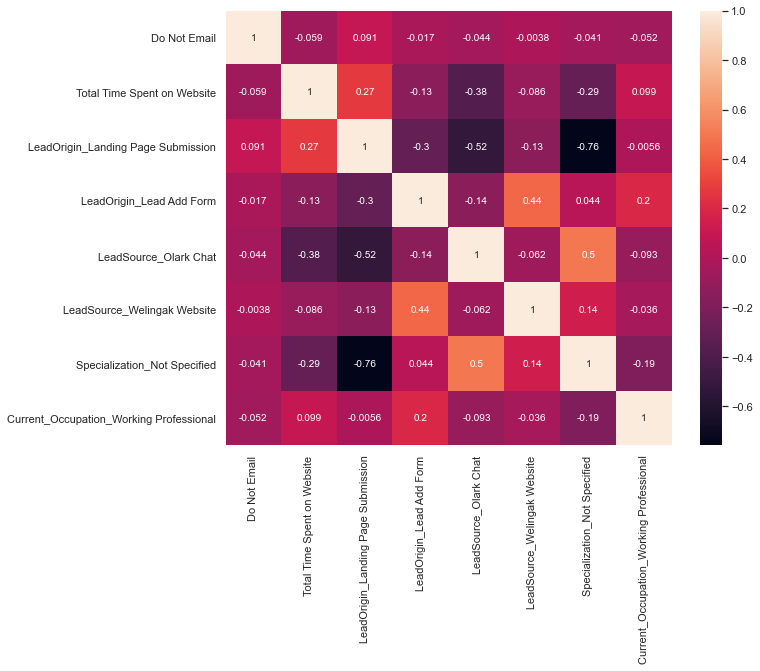

In [113]:
plt.figure(figsize=[10,8])
cor = X_train_M8.corr()
sns.heatmap(cor, annot=True)
plt.show()

- No multicollinearity present in the model.

In [114]:
#final columns 
fin_cols= X_train_M8.columns
fin_cols

Index(['Do Not Email', 'Total Time Spent on Website', 'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat', 'LeadSource_Welingak Website', 'Specialization_Not Specified', 'Current_Occupation_Working Professional'], dtype='object')

In [115]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm8)
y_train_pred[:10]

5493    0.143404
8064    0.112766
4716    0.062266
9117    0.191506
2402    0.432252
1796    0.191506
1120    0.191506
253     0.155397
1491    0.212603
2004    0.147808
dtype: float64

In [116]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14340356, 0.11276594, 0.0622658 , 0.19150575, 0.43225231,
       0.19150575, 0.19150575, 0.15539678, 0.21260258, 0.14780808])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [117]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID
0,0,0.143404,5493
1,0,0.112766,8064
2,0,0.062266,4716
3,0,0.191506,9117
4,1,0.432252,2402


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [118]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted
0,0,0.143404,5493,0
1,0,0.112766,8064,0
2,0,0.062266,4716,0
3,0,0.191506,9117,0
4,1,0.432252,2402,0


#### Confusion matrix

In [119]:
# function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()
    

In [120]:
# Confusion matrix 
confusion_m1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_m1)

[[3433  476]
 [ 872 1539]]


Ploting confusion matrix

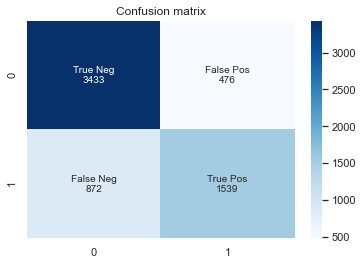

In [121]:
# ploting confusion matrix
plot_confusion_matrix(confusion_m1)

#### Overall Accuracy

In [122]:
# check the overall accuracy.
print("Accuracy score", metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Accuracy score 0.7867088607594936


the overall accuracy is 0.79 

#### Other Matrix - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value

In [123]:
TP = confusion_m1[1,1] # true positive 
TN = confusion_m1[0,0] # true negatives
FP = confusion_m1[0,1] # false positives
FN = confusion_m1[1,0] # false negatives

#### Sensitivity Matrix

In [124]:
# check the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
print('Sensitivity of the model : ',sensitivity )

Sensitivity of the model :  0.6383243467440896


#### Specificity Matrix

In [125]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
print('Specificity of the model : ',specificity )

Specificity of the model :  0.878229726272704


#### False Positive Rate

In [126]:
# Calculate false postive rate - predicting converted when lead does not converted
FPR=FP/ float(TN+FP)
print('False Positive Rate of the model : ',FPR )

False Positive Rate of the model :  0.12177027372729599


#### Positive Prediction Value

In [127]:
# positive predictive value 
PP_val=TP / float(TP+FP)
print('Positive Pedictive Value of the model : ',PP_val )

Positive Pedictive Value of the model :  0.7637717121588089


#### Negative Predictive Value

In [128]:
# Negative predictive value
NP_val=TN / float(TN+ FN)
print('Negative Pedictive Value of the model : ',NP_val )

Negative Pedictive Value of the model :  0.7974448315911731


## 10) Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

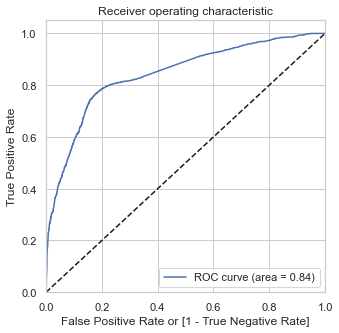

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [132]:
auc = metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
print('AUC: %.3f'% auc)

AUC: 0.842


- Area under the ROC Curve = 0.84

## 11) Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [133]:
# create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.143404,5493,0,1,1,0,0,0,0,0,0,0,0
1,0,0.112766,8064,0,1,1,0,0,0,0,0,0,0,0
2,0,0.062266,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.191506,9117,0,1,1,0,0,0,0,0,0,0,0
4,1,0.432252,2402,0,1,1,1,1,1,0,0,0,0,0


In [134]:
#  calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])  # True negative /(true negative + false positive )
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])  # True positive /(false negative + true positive)
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.442405  0.989631  0.104886
0.2   0.2  0.731329  0.824554  0.673830
0.3   0.3  0.797310  0.779345  0.808391
0.4   0.4  0.802057  0.729988  0.846508
0.5   0.5  0.786709  0.638324  0.878230
0.6   0.6  0.770411  0.537536  0.914045
0.7   0.7  0.752215  0.433015  0.949092
0.8   0.8  0.721835  0.309830  0.975953
0.9   0.9  0.705222  0.245541  0.988744


#### Ploting Accuracy, Sensitivity and Specificity for various probabilities

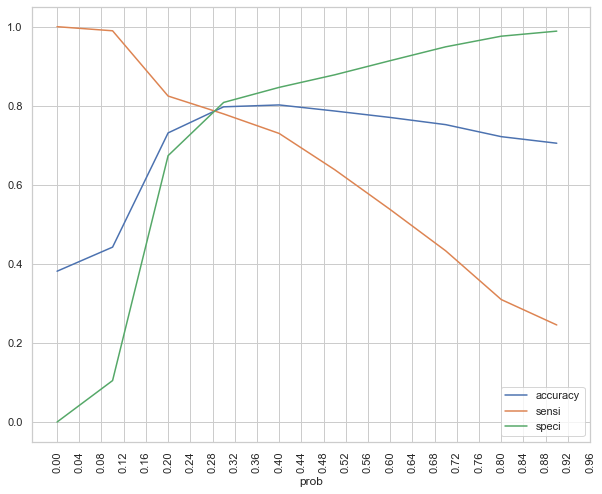

In [135]:
# Plot accuracy sensitivity and specificity for various probabilities

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,8))
plt.xticks(np.arange(0, 1, 0.04),rotation=90)

plt.show()

#### From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [136]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.143404,5493,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.112766,8064,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.062266,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.191506,9117,0,1,1,0,0,0,0,0,0,0,0,0
4,1,0.432252,2402,0,1,1,1,1,1,0,0,0,0,0,1


#### Accuracy

In [137]:
# Let's check the overall accuracy.
print("Accuracy score",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy score 0.7930379746835443


#### Confusion matrix

In [138]:
confusion_m2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_m2

array([[3113,  796],
       [ 512, 1899]], dtype=int64)

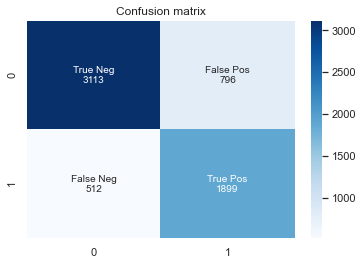

In [139]:
# ploting confusion matrix
plot_confusion_matrix(confusion_m2)

In [140]:
TP_2 = confusion_m2[1,1] # true positive 
TN_2 = confusion_m2[0,0] # true negatives
FP_2 = confusion_m2[0,1] # false positives
FN_2 = confusion_m2[1,0] # false negatives

In [141]:
# check the sensitivity of our logistic regression model
sensitivity=TP_2 / float(TP_2+FN_2)
print('Sensitivity of the model : ',sensitivity )

Sensitivity of the model :  0.7876399834093737


In [142]:
# Let us calculate specificity
specificity=TN_2 / float(TN_2+FP_2)
print('Specificity of the model : ',specificity )

Specificity of the model :  0.7963673573804042


In [143]:
# Calculate false postive rate - predicting converted when lead does not converted
FPR=FP_2/ float(TN_2+FP_2)
print('False Positive Rate of the model : ',FPR )

False Positive Rate of the model :  0.2036326426195958


In [144]:
# positive predictive value 
PP_val=TP_2 / float(TP_2+FP_2)
print('Positive Pedictive Value of the model : ',PP_val )

Positive Pedictive Value of the model :  0.7046382189239332


In [145]:
# Negative predictive value
NP_val=TN_2 / float(TN_2+ FN_2)
print('Negative Pedictive Value of the model : ',NP_val )

Negative Pedictive Value of the model :  0.8587586206896551


#### sensitivity is  0.78 , so we final model prediction for lead conversion is 78% thus we consider this as good model.

#### Precision and Recall matrix

#### Precesion

In [146]:
precision = precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Precision metrics of the model : ',precision )

Precision metrics of the model :  0.7637717121588089


#### Recall

In [147]:
recall=recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
print('Recall metrics of the model : ',recall)

Recall metrics of the model :  0.6383243467440896


### Precision and recall tradeoff

In [148]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

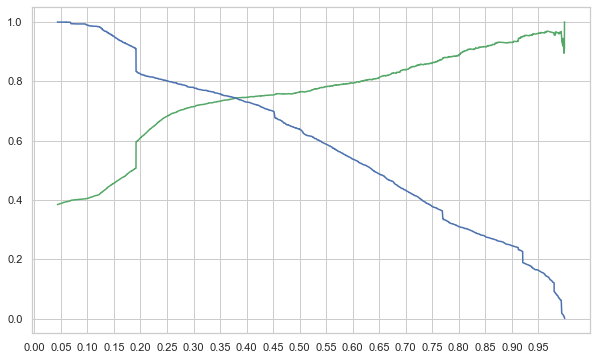

In [149]:
plt.figure(figsize=[10,6])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")
plt.xticks(np.arange(0, 1, step=0.05))

plt.show()

- Precsion Recall Graph, threshold value = 0.36.
- AIM is to have Lead Conversion around 80 percent.
- Hence will stay with 0.28 as cut off

## 11) Make prediction on Test dataset

In [150]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [151]:
X_test = X_test[fin_cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,Specialization_Not Specified,Current_Occupation_Working Professional
4664,0,-0.884316,0,0,1,0,1,0
5394,0,-0.583371,0,0,1,0,0,0
1595,0,1.264507,1,0,0,0,0,1
2111,0,0.073571,1,0,0,0,0,0
9182,0,-0.884316,0,0,1,0,1,0


In [152]:
X_test_sm = sm.add_constant(X_test)

Making prediction on Test set

In [153]:
y_test_pred=res.predict(X_test_sm)

In [154]:
y_test_pred[:5]

4664    0.191506
5394    0.532147
1595    0.946008
2111    0.279018
9182    0.191506
dtype: float64

In [155]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)

In [156]:
# checking head of the y_pred_df
y_pred_df.head()

,0
4664,0.191506
5394,0.532147
1595,0.946008
2111,0.279018
9182,0.191506


In [157]:
# converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)
#putting LeadID to index
y_test_df['LeadID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_df
y_pred_final_df = pd.concat([y_test_df, y_pred_df],axis=1)

In [158]:
# checking first few rows of the dataframe
y_pred_final_df.head()

,Converted,LeadID,0
0,0,4664,0.191506
1,0,5394,0.532147
2,1,1595,0.946008
3,0,2111,0.279018
4,0,9182,0.191506


In [159]:
# Renaming the column
y_pred_final_df= y_pred_final_df.rename(columns={ 0 : 'Converted_Prob'})
# Rearranging the columns
y_pred_final_df = y_pred_final_df.reindex(['LeadID','Converted','Converted_Prob'], axis=1)

In [160]:
# checking first few rows of the dataframe
y_pred_final_df.head()

,LeadID,Converted,Converted_Prob
0,4664,0,0.191506
1,5394,0,0.532147
2,1595,1,0.946008
3,2111,0,0.279018
4,9182,0,0.191506


In [161]:
y_pred_final_df['final_predicted'] = y_pred_final_df.Converted_Prob.map(lambda x: 1 if x > 0.28 else 0)

In [162]:
# checking first few rows of the dataframe
y_pred_final_df.head()

,LeadID,Converted,Converted_Prob,final_predicted
0,4664,0,0.191506,0
1,5394,0,0.532147,1
2,1595,1,0.946008,1
3,2111,0,0.279018,0
4,9182,0,0.191506,0


## Asigning Lead Score to Test Dataset

In [163]:
y_pred_final_df['Lead_Score'] = y_pred_final_df.Converted_Prob.map(lambda x: round(x*100))
y_pred_final_df.head()

,LeadID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4664,0,0.191506,0,19
1,5394,0,0.532147,1,53
2,1595,1,0.946008,1,95
3,2111,0,0.279018,0,28
4,9182,0,0.191506,0,19


#### Accuracy on test dataset

In [164]:
# Let's check the overall accuracy.
accuracy_test=metrics.accuracy_score(y_pred_final_df.Converted, y_pred_final_df.final_predicted)
print('Model accuracy on Test dataset : ',accuracy_test)

Model accuracy on Test dataset :  0.7884828349944629


#### Confusion matrix

In [165]:
confusion_m3 = metrics.confusion_matrix(y_pred_final_df.Converted, y_pred_final_df.final_predicted )
confusion_m3

array([[1294,  349],
       [ 224,  842]], dtype=int64)

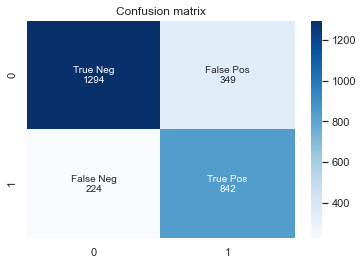

In [166]:
# plot confusion matrix for test dataset
plot_confusion_matrix(confusion_m3)

In [167]:
TP_3 = confusion_m3[1,1] # true positive 
TN_3 = confusion_m3[0,0] # true negatives
FP_3 = confusion_m3[0,1] # false positives
FN_3 = confusion_m3[1,0] # false negatives

#### Sensitivity and specificity

In [168]:
# Let's see the sensitivity of our logistic regression model
sensitivity_test=TP_3 / float(TP_3+FN_3)
print('Sensitivity of the model for test dataset: ',sensitivity_test )


Sensitivity of the model for test dataset:  0.7898686679174484


In [169]:
# Let us calculate specificity
specificity_test=TN_3 / float(TN_3+FP_3)
print('specificity of the model for test dataset: ',specificity_test )

specificity of the model for test dataset:  0.7875836883749239


In [170]:
# Calculate false postive rate - predicting converted when lead does not converted
FPR_test=FP_3/ float(TN_3+FP_3)
print('False Positive Rate of the model : ',FPR_test )

False Positive Rate of the model :  0.21241631162507607


In [171]:
# positive predictive value 
PP_val_test=TP_3 / float(TP_3+FP_3)
print('Positive Pedictive Value of the model : ',PP_val_test )

Positive Pedictive Value of the model :  0.7069689336691856


In [172]:
# Negative predictive value
NP_val_test=TN_3 / float(TN_3+ FN_3)
print('Negative Pedictive Value of the model : ',NP_val_test )

Negative Pedictive Value of the model :  0.852437417654809


#### Precision and Recall metrics for test dataset

In [173]:
#precision_test =  TP / (TP + FP)
precision_test=precision_score(y_pred_final_df.Converted, y_pred_final_df.final_predicted)
print('Precision metrics of the Model for Test Dataset : ',precision_test )

recall_test=recall_score(y_pred_final_df.Converted, y_pred_final_df.final_predicted)
print('Recall metrics of the model for Test Dataset: ',recall_test)

Precision metrics of the Model for Test Dataset :  0.7069689336691856
Recall metrics of the model for Test Dataset:  0.7898686679174484


In [174]:
p, r, thresholds = precision_recall_curve(y_pred_final_df.Converted, y_pred_final_df.Converted_Prob)

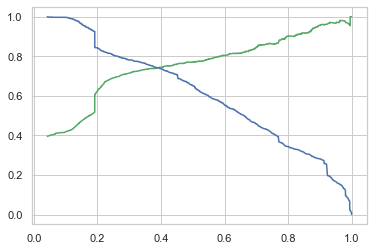

In [175]:

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "b-")

plt.show()

- We have checked sensitivity- specificity and precision-recall metrix for the model to decide the optimal cutoff
- models accuracy,sensitivity,specificity on train and test dataset are :
    - Train dataset :accuracy(79%),sensitivity (78%),specificity(79%)
    - Test Dataset : accuracy(78%),sensitivity (78%),specificity(78%)
- Hense we can conclude that this model is good.

## Features that are used to build model and provide Lead Score to dataset:

In [176]:
print("Important Features :\n")
for i in range(len(fin_cols)):
    print(fin_cols[i])

Important Features :

Do Not Email
Total Time Spent on Website
LeadOrigin_Landing Page Submission
LeadOrigin_Lead Add Form
LeadSource_Olark Chat
LeadSource_Welingak Website
Specialization_Not Specified
Current_Occupation_Working Professional


## OBSERVATION:

### Models accuracy,sensitivity,specificity on train and test dataset are :

### Train dataset :
 - accuracy: 79.3%
 - sensitivity: 78.7%
 - specificity: 79.6%
 
### Test Dataset : 
 - accuracy: 78.8%
 - sensitivity: 78% 
 - specificity: 78.7%
 
###### Hense we can conclude that this model is good.

## CONCLUSION:

- Logistic Regression Model: Rather then predicting target variable value the model predict the probability of the value of target variable.

-------------------------------------------------------------------------------------------------------------------------
- Cut off value came as `0.28`
            - any lead with greater than 0.28: as Hot Lead (customer will convert)
            - any lead with 0.28: predicted as Cold Lead (customer will not convert)
            
-------------------------------------------------------------------------------------------------------------------------

- Total `8` columns/features to build Logistic Regression Model
- Important Features:
        - Do Not Email
        - Total Time Spent on Website
        - Lead Origin_Landing Page Submission
        - LeadOrigin_Lead Add Form
        - LeadSource_Olark Chat
        - LeadSource_Welingak Website
        - Specialization_Not Specified
        - Current_Occupation_Working Professional
       
-------------------------------------------------------------------------------------------------------------------------

- The final model has Precision of 0.706, this means 71% of predicted hot leads are True Hot Leads.

-------------------------------------------------------------------------------------------------------------------------

- The lead conversation rate on the final predicted model is around 79% on train set and 78% on test set.